In [201]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from numpy import pi, random, sqrt
from qiskit.visualization import array_to_latex
from qiskit_ibm_runtime import EstimatorV2 as Estimator, QiskitRuntimeService
 
# Define the service.  This allows you to access IBM Quantum systems.
#service = QiskitRuntimeService()
 
# Get a backend
#backend = service.least_busy(operational=True, simulator=False)
 
# Define a local backend
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit import transpile

backend = GenericBackendV2(num_qubits=8)

In [212]:
# STEP 1: DEFINE OPERATOR   
operator = SparsePauliOp.from_list(
    [
        ("IIIIIIIZ", -1.5),
        #("IZZI", 0.5),
        #("XIXI", -0.5),
        #("YYXX", 0.5),
        #("IXXI", -1.5),
        #("ZIIZ", 0.5),
        #("YIYI", -0.5),
        #("YZZX", 0.5),
    ]
)

array_to_latex(operator)

<IPython.core.display.Latex object>

In [213]:
# STEP 2: DEFINE QUANTUM STATE  

circuit = QuantumCircuit(8)

circuit.x([i for i in range(8)])

In [214]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

isa_observable = operator.apply_layout(isa_circuit.layout)

In [219]:
estimator = Estimator(backend, options={"default_shots": int(1e5)})
estimator.options.resilience_level = 0
job = estimator.run([(isa_circuit, isa_observable)])
 
# Get results for the first (and only) PUB
pub_result = job.result()[0]
 
print(f">>> Expectation value: {pub_result.data.evs}")

c:\Users\felip\anaconda3\envs\coding_with_qiskit\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:247: UserWarning: Options {'default_shots': 100000} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


>>> Expectation value: 1.48828125


In [220]:
import csv

with open('5-qubit-real-vals_1.csv', 'w', newline='') as new_file: 
    for i in range(1000):
        job = estimator.run([(isa_circuit, isa_observable)])
        pub_result = job.result()[0]
        row = [pub_result.data.evs]
        writer = csv.writer(new_file)
        writer.writerow(row)


c:\Users\felip\anaconda3\envs\coding_with_qiskit\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:247: UserWarning: Options {'default_shots': 100000} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
c:\Users\felip\anaconda3\envs\coding_with_qiskit\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:247: UserWarning: Options {'default_shots': 100000} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
c:\Users\felip\anaconda3\envs\coding_with_qiskit\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:247: UserWarning: Options {'default_shots': 100000} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
c:\Users\felip\anaconda3\envs\coding_with_qiskit\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:247: UserWarning: O

KeyboardInterrupt: 

In [221]:
import numpy as np
import statistics

data = np.genfromtxt('8-qubit-exp-vals_1.csv', dtype='float', delimiter='', skip_header=0)

std = statistics.stdev(data)
mean = statistics.mean(data)


(array([  1.,   0.,   1.,   3.,  16.,  10.,  24.,  15.,  76.,  65.,  69.,
         92., 170.,  66.,  78.,  39.,  61.,  19.,   8.,  12.]),
 array([1.4765625 , 1.47747803, 1.47839355, 1.47930908, 1.48022461,
        1.48114014, 1.48205566, 1.48297119, 1.48388672, 1.48480225,
        1.48571777, 1.4866333 , 1.48754883, 1.48846436, 1.48937988,
        1.49029541, 1.49121094, 1.49212646, 1.49304199, 1.49395752,
        1.49487305]),
 <BarContainer object of 20 artists>)

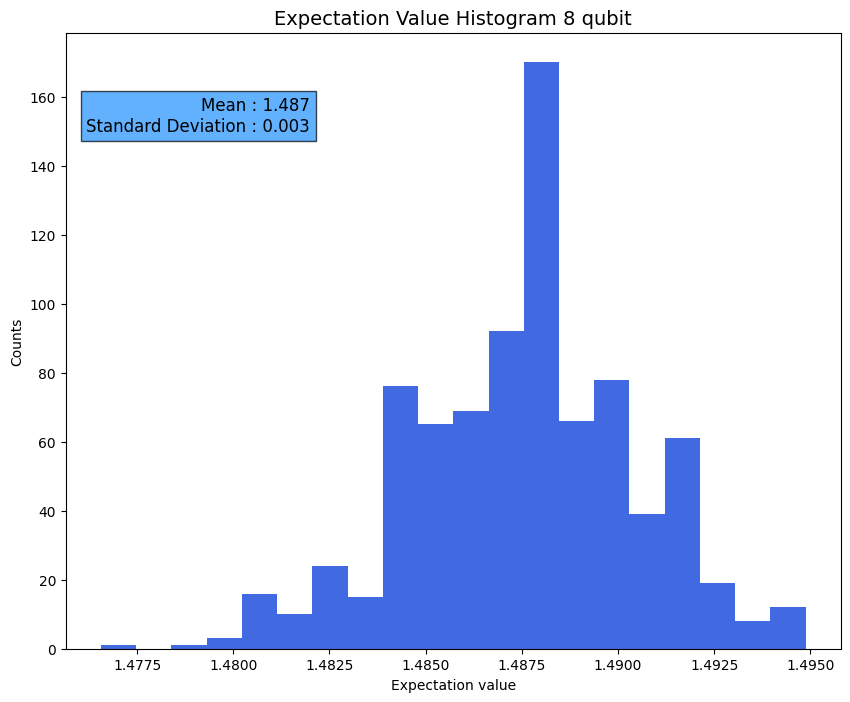

In [225]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_title("Expectation Value Histogram 8 qubit", fontsize=14)
ax.set_xlabel("Expectation value", fontsize=10)
ax.set_ylabel("Counts", fontsize=10)

ax.text(x=1.482,y=150, horizontalalignment='right', s=("Mean : {0:.3f}".format(mean) + "\n" + "Standard Deviation : {0:.3f}".format(std)),bbox=dict(facecolor='dodgerblue',alpha=0.7), fontsize=12)
ax.hist(data, bins=20, color='royalblue')